# Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [7]:
!dir  input

 Volume in drive C is Windows
 Volume Serial Number is 80A8-9307

 Directory of C:\Users\rahul\Desktop\Hackathon 2023\hackathon2023\input

10-07-2023  15:41    <DIR>          .
10-07-2023  15:41    <DIR>          ..
10-07-2023  15:27            46,712 Emp_data.csv
10-07-2023  15:27            14,485 move_in_sync_data.csv
10-07-2023  15:27            27,146 vendor.csv
               3 File(s)         88,343 bytes
               2 Dir(s)  55,189,299,200 bytes free


#### The several key items in this folder:

**Emp_data.csv**: Employee data

**move_in_sync_data.csv**: Employee comute data

**vendor.csv**: Vendor data for coupons

Let's go ahead and take a look at the first labels CSV file first:

In [21]:
employee_df = pd.read_csv('input/Emp_data.csv')
employee_df.head()

,EMP_ID,Location,Swipe_In,Swipe_Out
0,8626487,MUM,04-10-2022 15:23,05-10-2022 01:23
1,8631177,MUM,08-06-2023 21:17,09-06-2023 07:17
2,8678631,MGP,23-12-2022 10:18,23-12-2022 19:18
3,8574819,BB,03-08-2022 18:26,04-08-2022 05:26
4,8587539,MGP,12-01-2023 12:57,12-01-2023 18:57


In [20]:
comute_df = pd.read_csv('input/move_in_sync_data.csv')
comute_df.head()

,EMP_ID,Location,Car_Park,Commute_to_office_mins,Commute_from_office_mins
0,8744085,MGP,NO,21.0,32.0
1,8529428,MUM,YES,NaN,NaN
2,8501125,BB,NO,99.0,200.0
3,8596574,MUM,YES,NaN,NaN
4,8500129,BB,YES,NaN,NaN


In [39]:
vendor_df = pd.read_csv('input/vendor.csv')
vendor_df.head()

,Vendor,Date,Transaction_Value
0,ANTARANG,01-09-2022 07:56,289
1,SWARA,07-02-2023 04:07,440
2,SUBWAY,09-03-2023 07:48,155
3,SWARA,29-05-2023 02:57,312
4,BISTRO,03-12-2022 23:46,53


In [31]:
new_df = pd.merge(employee_df, comute_df, on=["EMP_ID","Location"], how="left")

In [32]:
new_df

,EMP_ID,Location,Swipe_In,Swipe_Out,Car_Park,Commute_to_office_mins,Commute_from_office_mins
0,8626487,MUM,04-10-2022 15:23,05-10-2022 01:23,NaN,NaN,NaN
1,8631177,MUM,08-06-2023 21:17,09-06-2023 07:17,NaN,NaN,NaN
2,8678631,MGP,23-12-2022 10:18,23-12-2022 19:18,NaN,NaN,NaN
3,8574819,BB,03-08-2022 18:26,04-08-2022 05:26,NaN,NaN,NaN
4,8587539,MGP,12-01-2023 12:57,12-01-2023 18:57,NaN,NaN,NaN
...,...,...,...,...,...,...,...
995,8678065,BB,05-03-2023 07:41,05-03-2023 17:41,NaN,NaN,NaN
996,8687147,MGP,23-01-2023 02:16,23-01-2023 10:16,NaN,NaN,NaN
997,8509597,BB,03-12-2022 12:40,03-12-2022 12:40,NaN,NaN,NaN
998,8638630,MGP,27-01-2023 16:20,27-01-2023 16:20,NaN,NaN,NaN


In [37]:
employee_df.merge(comute_df, left_on='EMP_ID', right_on='EMP_ID')

,EMP_ID,Location_x,Swipe_In,Swipe_Out,Location_y,Car_Park,Commute_to_office_mins,Commute_from_office_mins
0,8521413,MUM,28-09-2022 19:54,29-09-2022 06:54,MGP,YES,NaN,NaN
1,8460554,MUM,05-10-2022 15:09,06-10-2022 00:09,MGP,NO,37.0,143.0
2,8560874,MGP,25-06-2023 07:09,25-06-2023 17:09,BB,YES,NaN,NaN


In [42]:
comute_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EMP_ID                    700 non-null    int64  
 1   Location                  700 non-null    object 
 2   Car_Park                  700 non-null    object 
 3   Commute_to_office_mins    374 non-null    float64
 4   Commute_from_office_mins  374 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 27.5+ KB


In [43]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   EMP_ID     1000 non-null   int64 
 1   Location   1000 non-null   object
 2   Swipe_In   1000 non-null   object
 3   Swipe_Out  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [44]:
vendor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Vendor             900 non-null    object
 1   Date               900 non-null    object
 2   Transaction_Value  900 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.2+ KB


In [45]:
vendor_df

,Vendor,Date,Transaction_Value
0,ANTARANG,01-09-2022 07:56,289
1,SWARA,07-02-2023 04:07,440
2,SUBWAY,09-03-2023 07:48,155
3,SWARA,29-05-2023 02:57,312
4,BISTRO,03-12-2022 23:46,53
...,...,...,...
895,WOK,29-01-2023 22:36,41
896,JUICE BAR,29-07-2022 22:28,194
897,SOUTHERN EXPRESS,24-11-2022 04:56,199
898,SUBWAY,05-09-2022 15:23,114


# Vendor analysis 

In [61]:
vendor_df['Date']=pd.to_datetime(vendor_df['Date'],  format='%d-%m-%Y %H:%M')

In [64]:
vendor_df.head()

,Vendor,Date,Transaction_Value
0,ANTARANG,2022-09-01 07:56:00,289
1,SWARA,2023-02-07 04:07:00,440
2,SUBWAY,2023-03-09 07:48:00,155
3,SWARA,2023-05-29 02:57:00,312
4,BISTRO,2022-12-03 23:46:00,53


In [67]:
vendor_df.Vendor.unique()

array(['ANTARANG', 'SWARA', 'SUBWAY', 'BISTRO', 'VOHUMAN', 'WOK',
       'SOUTHERN EXPRESS', 'JUICE BAR'], dtype=object)

In [71]:
vendor_df = vendor_df.set_index('Date')
vendor_df.head(3)

,Vendor,Transaction_Value
Date,,
2022-09-01 07:56:00,ANTARANG,289
2023-02-07 04:07:00,SWARA,440
2023-03-09 07:48:00,SUBWAY,155


In [70]:
import seaborn as sns

In [73]:
vendor_df['Year'] = vendor_df.index.year
vendor_df['Month'] = vendor_df.index.month
# Display a random sampling of 5 rows
vendor_df.sample(5, random_state=0)

,Vendor,Transaction_Value,Year,Month
Date,,,,
2022-10-30 00:18:00,BISTRO,268,2022,10
2022-12-06 10:41:00,JUICE BAR,349,2022,12
2023-04-15 02:44:00,WOK,294,2023,4
2023-02-21 16:25:00,VOHUMAN,276,2023,2
2022-11-03 02:24:00,BISTRO,404,2022,11


In [74]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

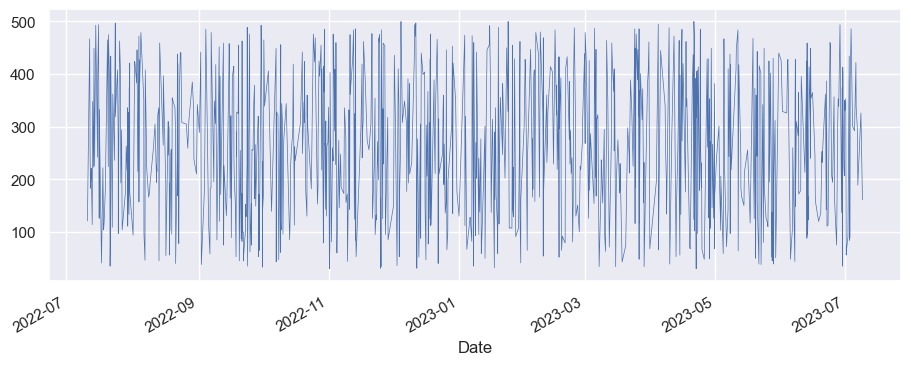

In [75]:
vendor_df['Transaction_Value'].plot(linewidth=0.5);

In [76]:
vendor_df['Vendor'].value_counts()

Vendor
WOK                 124
ANTARANG            123
SUBWAY              119
VOHUMAN             115
BISTRO              113
SWARA               109
JUICE BAR           101
SOUTHERN EXPRESS     96
Name: count, dtype: int64

In [97]:
transactions_22=vendor_df[vendor_df['Year'] == 2022 ]
transactions_22

,Vendor,Transaction_Value,Year,Month
Date,,,,
2022-09-01 07:56:00,ANTARANG,289,2022,9
2022-12-03 23:46:00,BISTRO,53,2022,12
2022-07-13 07:19:00,SUBWAY,348,2022,7
2022-12-03 11:40:00,BISTRO,410,2022,12
2022-12-12 13:57:00,VOHUMAN,277,2022,12
...,...,...,...,...
2022-09-23 00:18:00,ANTARANG,153,2022,9
2022-07-29 22:28:00,JUICE BAR,194,2022,7
2022-11-24 04:56:00,SOUTHERN EXPRESS,199,2022,11


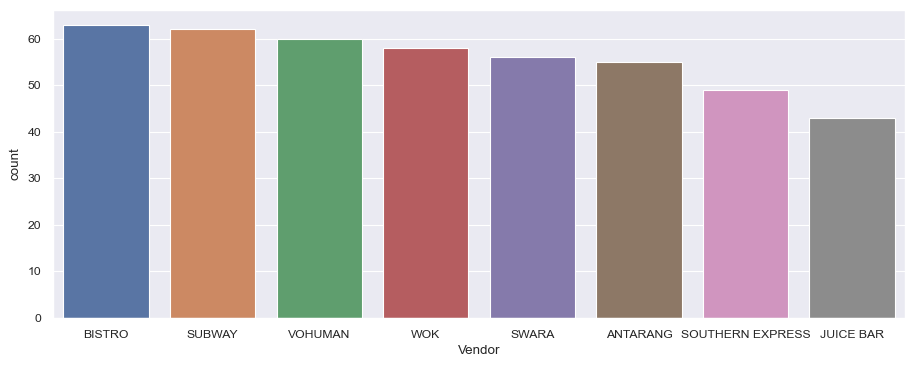

In [106]:
sns.set_context('paper')
sns.barplot(x=transactions_22.Vendor.value_counts().index, y=transactions_22.Vendor.value_counts())
plt.show()